<center>
  <h1 style="font-family: Georgia, sans-serif; font-size: 48px; font-weight: bold; color: black;">
    Hotel Booking Cancellation Prediction
  </h1>
</center>

## Problem Statement

***The INN Hotels Group is experiencing significant inventory loss and revenue decline due to frequent booking cancellations. They seek your expertise to develop a Data Science solution that can predict the likelihood of a booking being canceled, enabling them to implement strategies to mitigate potential vacancies.***

# **Business Context and Problem Definition**

## Business Context

With the increasing popularity and ease of access to online hotel booking platforms, customers tend to make reservations in advance to avoid any last-minute rush and higher prices. These online platforms offer flexible cancellation options, in some cases even a day before reservation. To compete with this, even offline bookings have increased the flexibility in cancellations. This has led to an increase in the growing number of cancellations, with one of the primary reasons being last-minute changes in travel plans. These sudden changes can result from unforeseen circumstances, such as personal emergencies, flight delays, or unexpected events at the travel destination.

Hotel booking cancellations become a crucial problem to solve as it leads to revenue loss and operational inefficiencies. The cancellation of bookings impacts a hotel on various fronts:

1. Loss of revenue when the hotel cannot resell the room

2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms

3. Lowering prices last minute, so the hotel can resell a room, resulting in reduced profit margins

## Problem Definition
The INN Hotels Group has been contending with the challenge of rising cancellations for nearly a year now. However, the last three months witnessed a rise in inventory loss due to cancellation rise to an all-time high of 18%. This has led to a jump in the revenue loss to an all-time high of approx. $0.25 million annually. This has significantly impacted their profit margins.

In the current context, inventory refers to a hotel room, and the inability to sell one leads to inventory loss
The group has been using heuristic mechanisms (rule and domain expert-based) to try and reduce the revenue loss due to cancellations, but this hasn't been effective so far hasn't been effective (neither efficient nor scalable), as evident from the magnitude of losses they are incurring.

The group has decided that they need a Data Science-based solution to predict the likelihood of a booking being canceled as they expect it to be more effective than their current mechanism. They hope that this proactive approach will help them significantly minimize revenue loss and improve operational efficiency.

## Importing the necessary libraries

In [32]:
# Libraries for data handling and manipulation
import pandas as pd
import numpy as np
import scipy.stats as stats

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set display options for pandas
pd.set_option("display.max_columns", None)  # Display all columns
pd.set_option("display.max_rows", 200)       # Limit display to 200 rows
pd.set_option("display.float_format", lambda x: "%.2f" % x)  # Set precision of float numbers to 2 decimal points

# Machine learning models and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, VotingClassifier, StackingClassifier)
from xgboost import XGBClassifier
from sklearn.metrics import (classification_report, confusion_matrix, cohen_kappa_score, roc_auc_score, 
                             roc_curve, accuracy_score, precision_score, recall_score, f1_score)
# Fine tune
from sklearn.model_selection import GridSearchCV

## Loading the dataset

In [33]:
past_data=pd.read_csv('INNHotelsGroup_pastdata.csv')
new_data=pd.read_csv('INNHotelsGroup_newdata.csv')

In [34]:
past_data.sample(10, random_state=2)

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status,rebooked
23418,INNHG_124452,101,Online,0,132.60,2,0,2022-05-25,0,4,Not Canceled,NaN
2960,INNHG_103994,359,Offline,1,78.00,2,2,2021-03-14,0,3,Not Canceled,NaN
27055,INNHG_128089,6,Online,0,139.00,2,0,2022-06-30,0,1,Canceled,No
7922,INNHG_108956,131,Offline,0,94.50,2,2,2021-08-15,0,1,Canceled,No
17983,INNHG_119017,143,Offline,0,59.50,2,1,2022-03-25,0,2,Not Canceled,NaN
1679,INNHG_102713,182,Online,1,112.20,2,1,2021-02-15,0,3,Canceled,No
16794,INNHG_117828,17,Online,0,75.00,1,0,2022-03-09,0,1,Not Canceled,NaN
23253,INNHG_124287,31,Online,2,108.90,2,1,2022-05-22,0,0,Not Canceled,NaN
3416,INNHG_104450,232,Online,3,80.75,1,0,2021-03-19,0,4,Not Canceled,NaN
12677,INNHG_113711,8,Online,2,84.00,1,2,2021-12-04,0,2,Not Canceled,NaN


In [35]:
new_data.sample(10, random_state=2)

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
2550,INNHG_130677,57,Online,1,123.30,2,0,2022-09-01,0,3,Canceled
1868,INNHG_129995,156,Online,1,115.25,2,2,2022-08-14,1,3,Canceled
2303,INNHG_130430,230,Online,1,72.75,2,1,2022-08-29,0,3,Not Canceled
1606,INNHG_129733,187,Online,1,99.45,2,4,2022-08-06,0,6,Canceled
549,INNHG_128676,98,Online,0,141.75,2,1,2022-07-11,0,3,Not Canceled
1854,INNHG_129981,127,Online,0,139.50,2,1,2022-08-14,1,0,Not Canceled
2216,INNHG_130343,13,Online,0,122.00,2,2,2022-08-26,0,3,Canceled
2064,INNHG_130191,115,Offline,0,82.45,2,2,2022-08-22,0,5,Not Canceled
520,INNHG_128647,17,Online,0,139.00,2,1,2022-07-11,0,1,Not Canceled
2958,INNHG_131085,4,Online,0,159.00,1,0,2022-09-15,0,1,Not Canceled


In [36]:
print(f" Past Data Rows   : {past_data.shape[0]}")
print(f" Past Data Columns: {past_data.shape[1]}")

 Past Data Rows   : 27093
 Past Data Columns: 12


In [37]:
print(f" New Data Rows   : {new_data.shape[0]}")
print(f" New Data Columns: {new_data.shape[1]}")

 New Data Rows   : 3583
 New Data Columns: 11


# Exploratory Data Analysis¶
Exploratory Data Analysis (EDA) plays a very important role in an end-to-end Data Science solution. It enables

Understanding the Data: EDA comprehensively reveals the dataset's structure, patterns, and issues. It assesses data quality, identifies missing values, outliers, and inconsistencies, vital for preprocessing and model development.
Identifying Data Patterns and Insights: EDA discovers meaningful patterns, trends, and relationships through statistical techniques, visualizations, and summarization. It guides model development, hypothesis generation, and decision-making.
Feature Selection and Engineering: EDA identifies relevant features by analyzing variable relationships, exploring correlations, and visualizing distributions. It improves model prediction by selecting informative features and creating new ones through feature engineering.

### Descriptive Analysis

In [38]:
# checking the statistical summary of the data
past_data.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,27093.00,81.61,84.90,0.00,14.00,55.00,118.00,443.00
no_of_special_requests,27093.00,0.56,0.74,0.00,0.00,0.00,1.00,5.00
avg_price_per_room,27093.00,101.03,34.56,0.00,79.00,97.00,119.00,540.00
no_of_adults,27093.00,1.83,0.51,0.00,2.00,2.00,2.00,4.00
no_of_weekend_nights,27093.00,0.78,0.86,0.00,0.00,1.00,1.00,6.00
required_car_parking_space,27093.00,0.03,0.17,0.00,0.00,0.00,0.00,1.00
no_of_week_nights,27093.00,2.17,1.39,0.00,1.00,2.00,3.00,17.00


In [39]:
past_data.describe(include='object').T

,count,unique,top,freq
booking_id,27093,27093,INNHG_101034,1
market_segment_type,27093,2,Online,18456
arrival_date,27093,439,2021-03-19,279
booking_status,27093,2,Not Canceled,18236
rebooked,8857,2,No,7092


* The number of adults ranges from 0 to 4, which seems as usual
* The range of the number of weeks and weekend nights seems fine, although 6 weekends might be a very long stay
* At least 75% of the customers do not require car parking space
* On average the customers book 82 days in advance, while at least 75% of customers make hotel bookings 4 months in advance
* The average price per room is ~100

In [40]:
past_data.arrival_date.describe()

count          27093
unique           439
top       2021-03-19
freq             279
Name: arrival_date, dtype: object

- The data contains bookings of customers arriving between Jan 2021 and Jun 2022

# Correlation

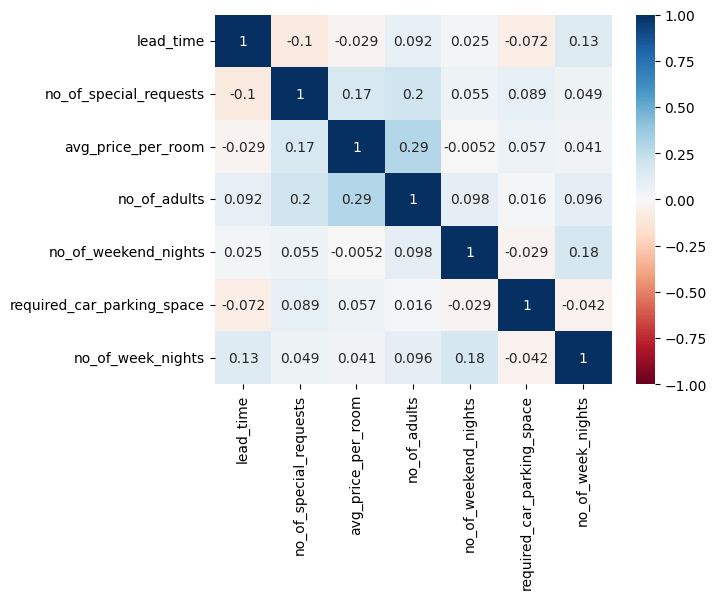

In [41]:
sns.heatmap(past_data.corr(numeric_only=True),annot=True,cmap='RdBu',vmax=1,vmin=-1)
plt.show()

- **Adults and Average Price**:
The number of adults is positively correlated with the average price per room (0.29), indicating that rooms booked by more adults tend to be more expensive.

- **Lead Time and Weeknights**:
Lead time is positively correlated with the number of weeknights (0.13), suggesting that bookings made further in advance are more likely to include weekdays.

- **Special Requests and Adults**:
The number of special requests is positively correlated with the number of adults (0.20), indicating that larger groups tend to have more special requests.

- **Weekend Nights and Weeknights**:
There is a positive correlation between the number of weekend nights and the number of weeknights (0.18), suggesting that longer stays often include both weekdays and weekends.

- **Parking and Special Requests**:
The required car parking space is positively correlated with the number of special requests (0.09), indicating that guests who need parking also tend to have other special requests.

# Assing Correct Datatypes

In [42]:
#past_data.dtypes

In [43]:
#past_data['arrival_date']=pd.to_datetime(past_data['arrival_date'])

In [44]:
actual_y=new_data['booking_status']

In [45]:
new_data.drop(columns=['booking_status'],inplace=True)

In [46]:
new_data.head(2)

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights
0,INNHG_128127,4,Online,1,103.00,1,0,2022-07-01,1,1
1,INNHG_128128,147,Online,2,103.70,2,2,2022-07-01,0,2


In [47]:
data=pd.concat([past_data,new_data],axis=0)

In [48]:
data.shape

(30676, 12)

In [49]:
data['arrival_date']=pd.to_datetime(data['arrival_date'],format='%Y-%m-%d')

In [50]:
data['arrival_Day']=data['arrival_date'].dt.day
data['arrival_Month']=data['arrival_date'].dt.month
data['arrival_Weekday']=data['arrival_date'].dt.weekday

## Drop Booking ID and Arrival Date

In [51]:
data.drop(columns=['booking_id','arrival_date'],inplace=True)

In [52]:
data.columns

Index(['lead_time', 'market_segment_type', 'no_of_special_requests',
       'avg_price_per_room', 'no_of_adults', 'no_of_weekend_nights',
       'required_car_parking_space', 'no_of_week_nights', 'booking_status',
       'rebooked', 'arrival_Day', 'arrival_Month', 'arrival_Weekday'],
      dtype='object')

In [53]:
num_cols=['lead_time','avg_price_per_room','arrival_Day']
cat_cols=['market_segment_type', 'no_of_special_requests','no_of_adults', 'no_of_weekend_nights','required_car_parking_space', 'no_of_week_nights', 'booking_status','rebooked', 'arrival_Month', 'arrival_Weekday']

# Univariate Analysis
Univariate analysis involves examining the distribution and characteristics of a single variable. This analysis helps understand central tendencies (mean, median), dispersion (range, variance), and shape (skewness, kurtosis). It's a fundamental step in data exploration, providing insights into individual variables without considering their relationships with others.

## Numerical Columns

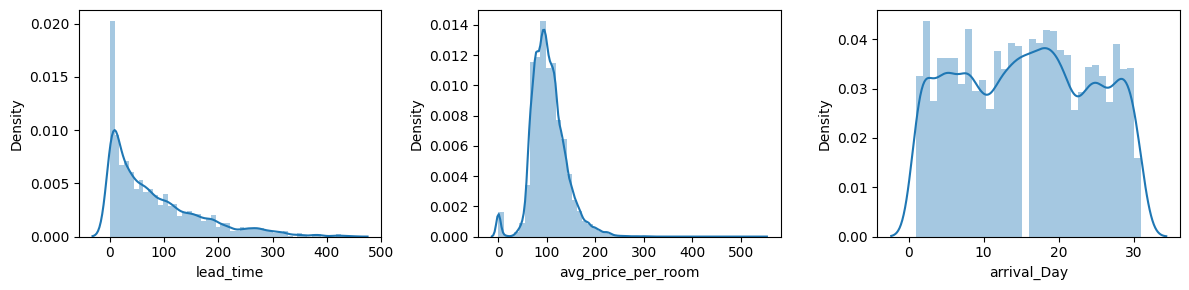

In [54]:
t=1
plt.figure(figsize=(12,3))
for i in num_cols:
    plt.subplot(1,3,t)
    sns.distplot(data[i])
    t+=1
plt.tight_layout()
plt.show()

###### Inferences from Univariate Analysis
- ***Lead Time:***
The distribution is heavily right-skewed, indicating that most bookings are made within a short period before the stay, with a few made far in advance.

- ***Average Price per Room:***
The distribution is also right-skewed, showing that most rooms are booked at lower prices, with a smaller number of high-priced bookings.

- ***Arrival Day:***
The distribution appears relatively uniform, suggesting that bookings are spread throughout the month without significant peaks or troughs on specific days.

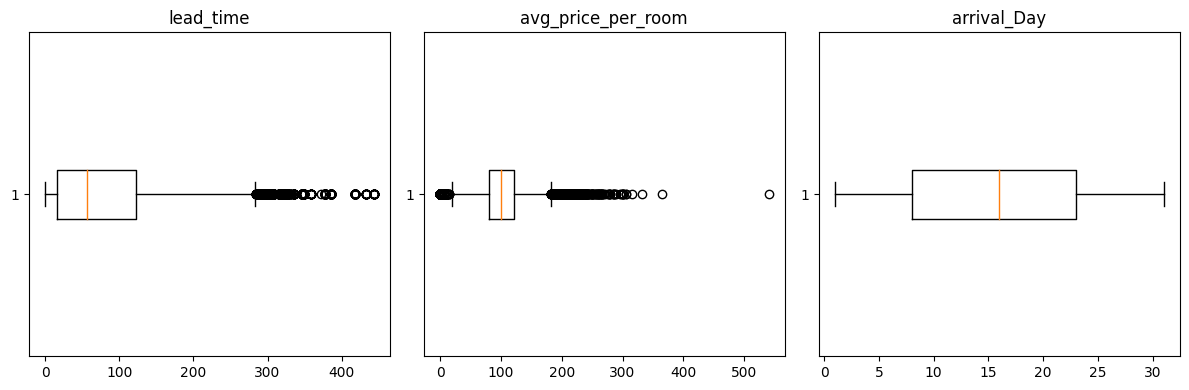

In [55]:
t=1
plt.figure(figsize=(12,4))
for i in num_cols:
    plt.subplot(1,3,t)
    plt.boxplot(x=data[i],vert=False)
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

**Inferences from Boxplots**
- ***Lead Time:***
The boxplot shows a right-skewed distribution with many outliers, indicating that while most bookings are made with a shorter lead time, there are several cases where bookings are made far in advance.
- ***Average Price per Room:***
The boxplot shows a right-skewed distribution with many outliers. Most room prices are clustered in the lower range, but there are a significant number of higher-priced outliers.
- ***Arrival Day:***
The boxplot for arrival day shows a relatively uniform distribution with no significant outliers. Bookings are evenly spread across the days of the month.

## Categorical Columns

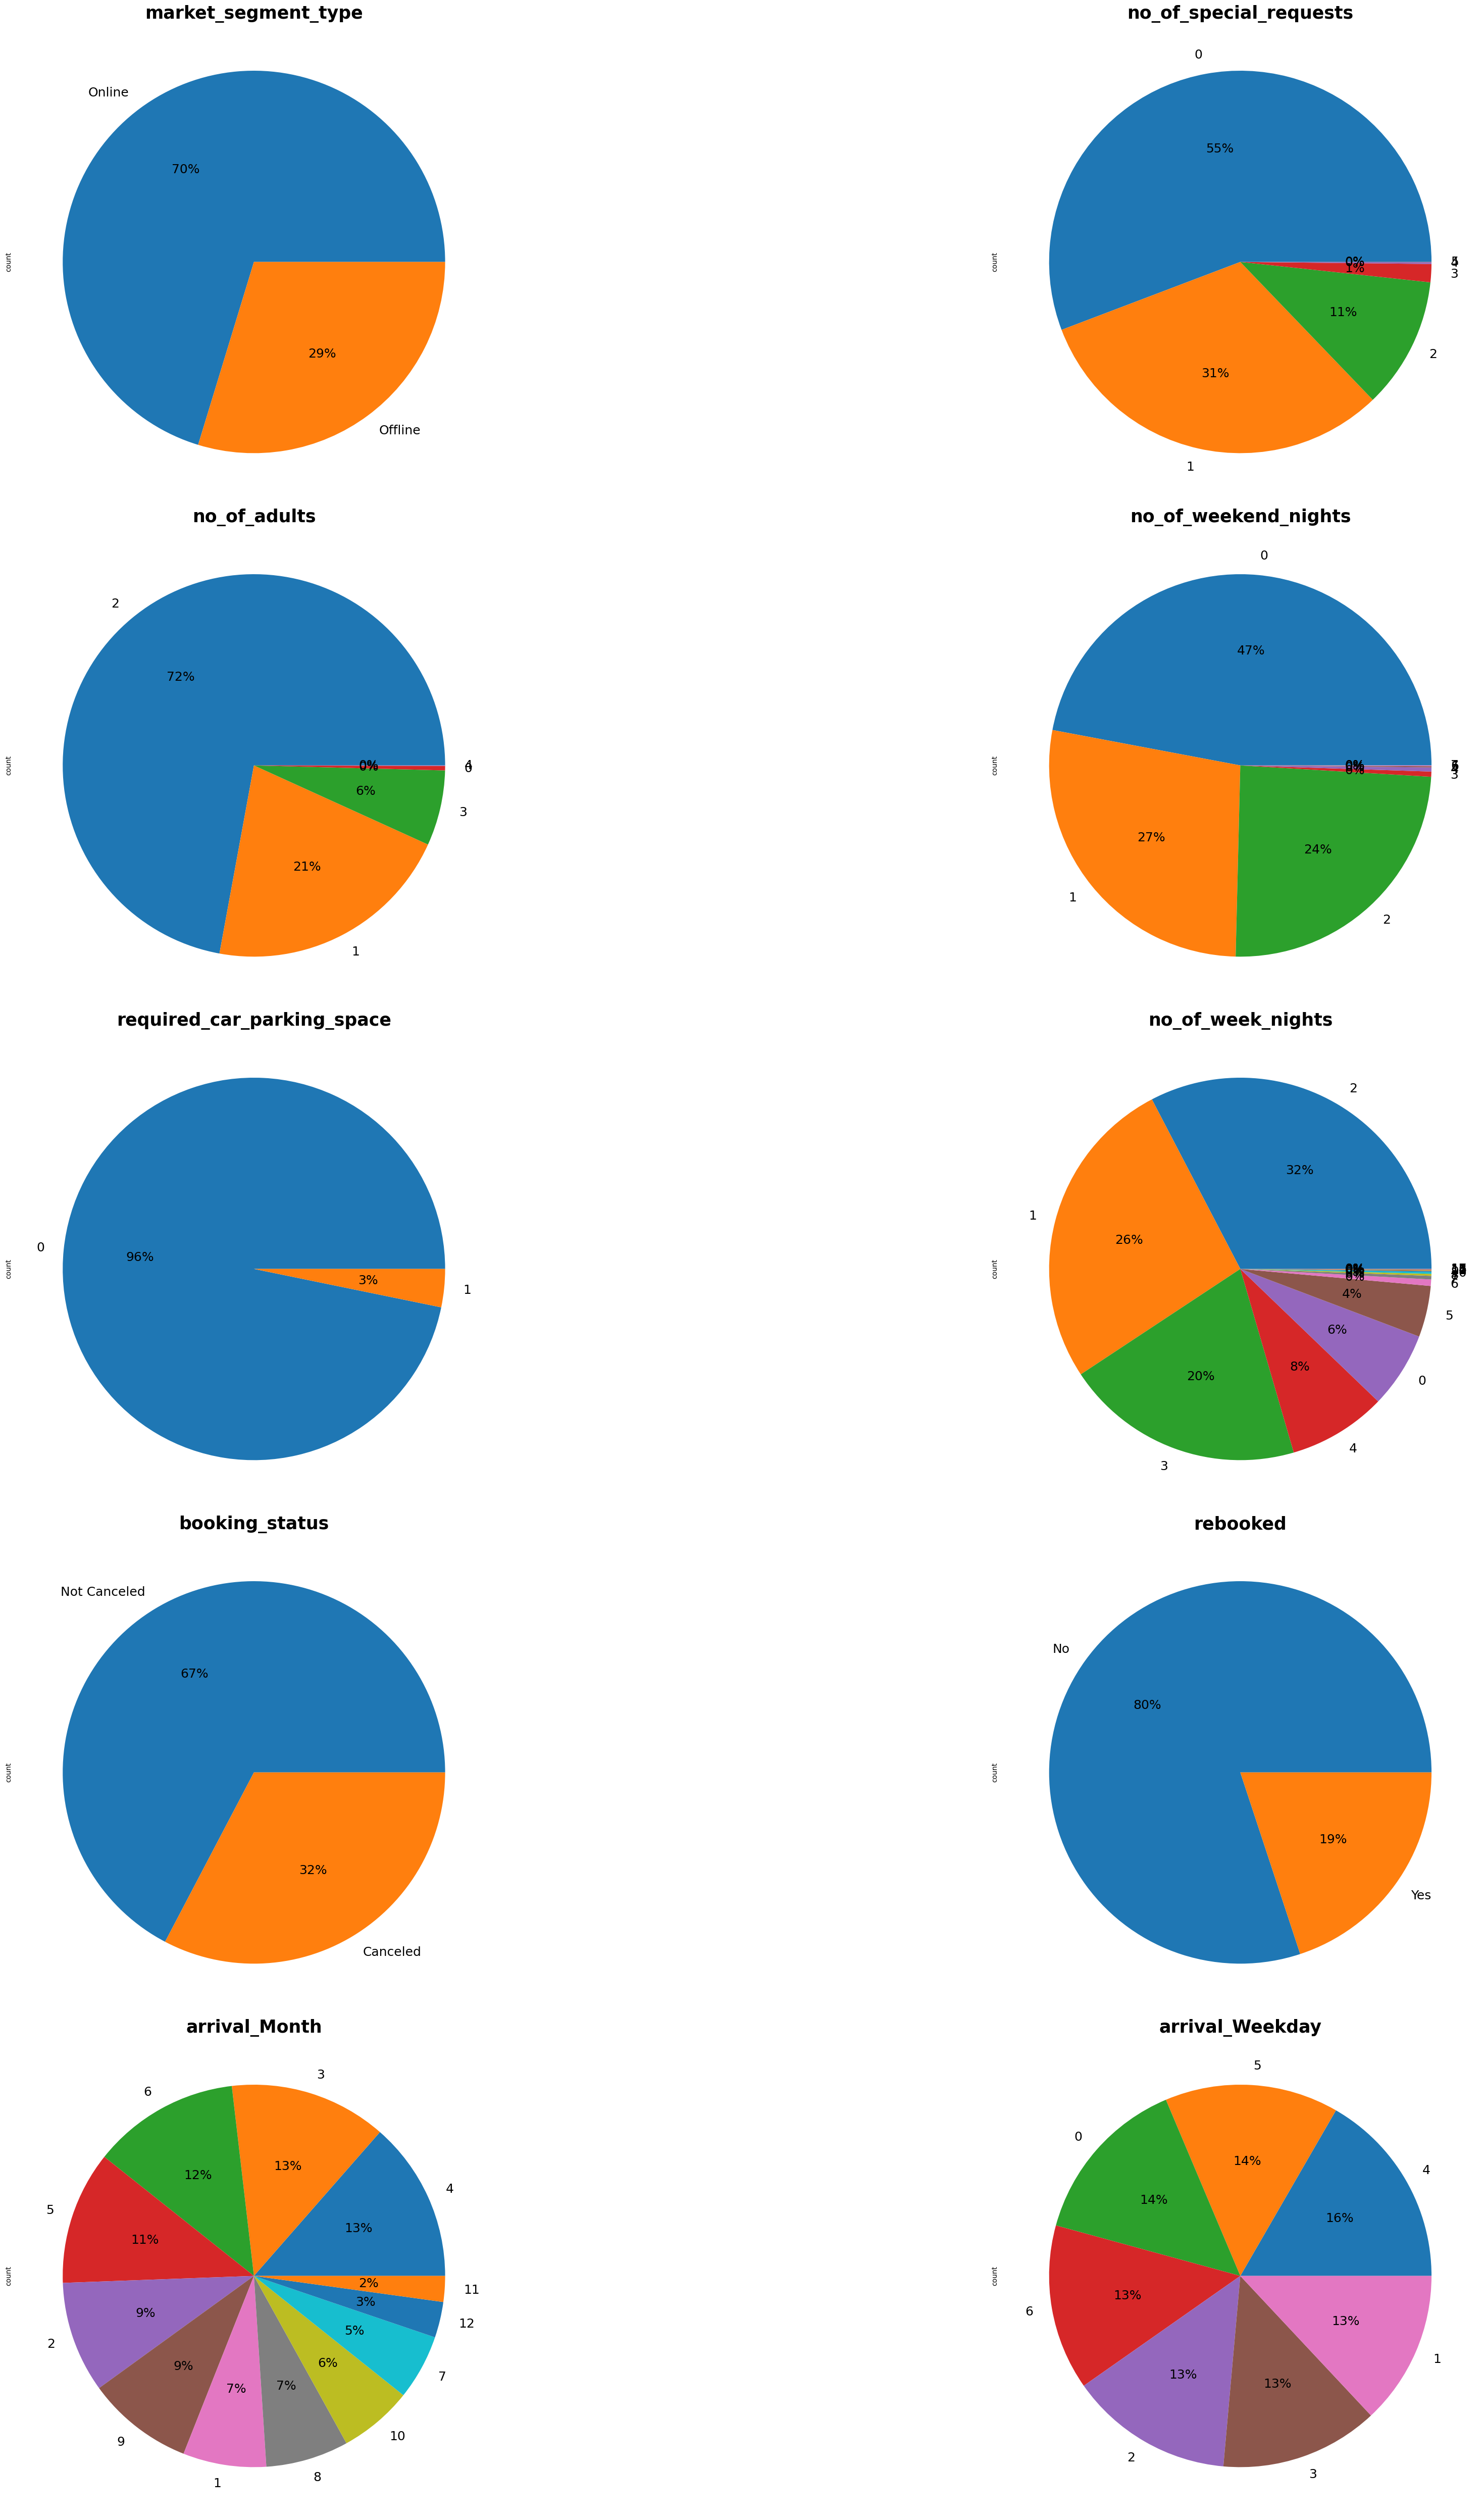

In [56]:
t=1
plt.figure(figsize=(50,50))
for i in cat_cols:
    plt.subplot(5,2,t)
    data[i].value_counts().plot(kind='pie',autopct='%i%%',fontsize=18)
    plt.title(i,fontsize=25,weight='bold')
    t+=1
plt.tight_layout()
plt.show()

- A few bookings have a lead time exceeding 300 days.
- Some bookings show an average room price of zero, while others exceed 300.
- Approximately 70% of the bookings are made online.
- Most bookings include either one special request or none at all.
- The majority of rooms are booked for couples or single occupancy.
- Most bookings involve 0, 1, or 2 weekend nights.
- Approximately 90% of bookings do not require a parking space.
- Most bookings are for 1, 2, or 3 weeknights.
- The cancellation rate is approximately 33%.

## Analyze Rebooking Data

<Axes: xlabel='booking_status'>

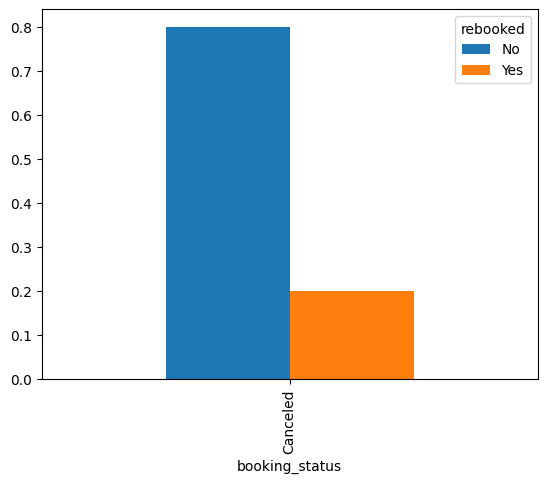

In [57]:
pd.crosstab(index=data['booking_status'],columns=data['rebooked'],normalize=True).plot(kind='bar')

- Of the 33% cancellations, 80% were not rebooked.
- Primarily due to last-minute cancellations. 
###### ***This results in significant losses for the company. We can address this issue by predicting cancellations well in advance.***

# Bivariate Analysis
Bivariate analysis examines the relationship between two variables. It helps identify correlations, dependencies, and interactions, revealing patterns such as trends or associations. Techniques include scatter plots, correlation coefficients, and cross-tabulations. This analysis is crucial for understanding how one variable may affect or predict changes in another, aiding in more informed decision-making.

### NUMBER V/S CATEGORY

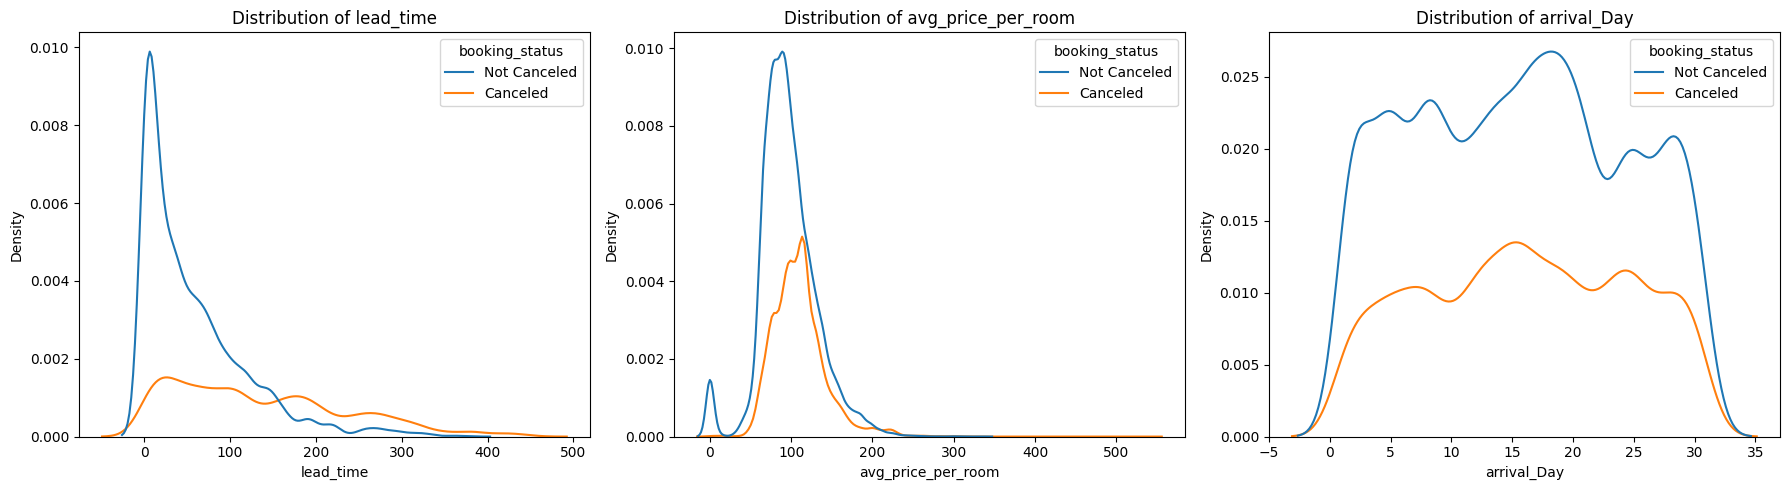

In [58]:
t = 1
plt.figure(figsize=(18, 5))
for i in ['lead_time', 'avg_price_per_room', 'arrival_Day']:
    plt.subplot(1, 3, t)
    sns.kdeplot(x=data[i], hue=data['booking_status'])
    plt.title(f'Distribution of {i}')
    t += 1
plt.tight_layout()
plt.show()

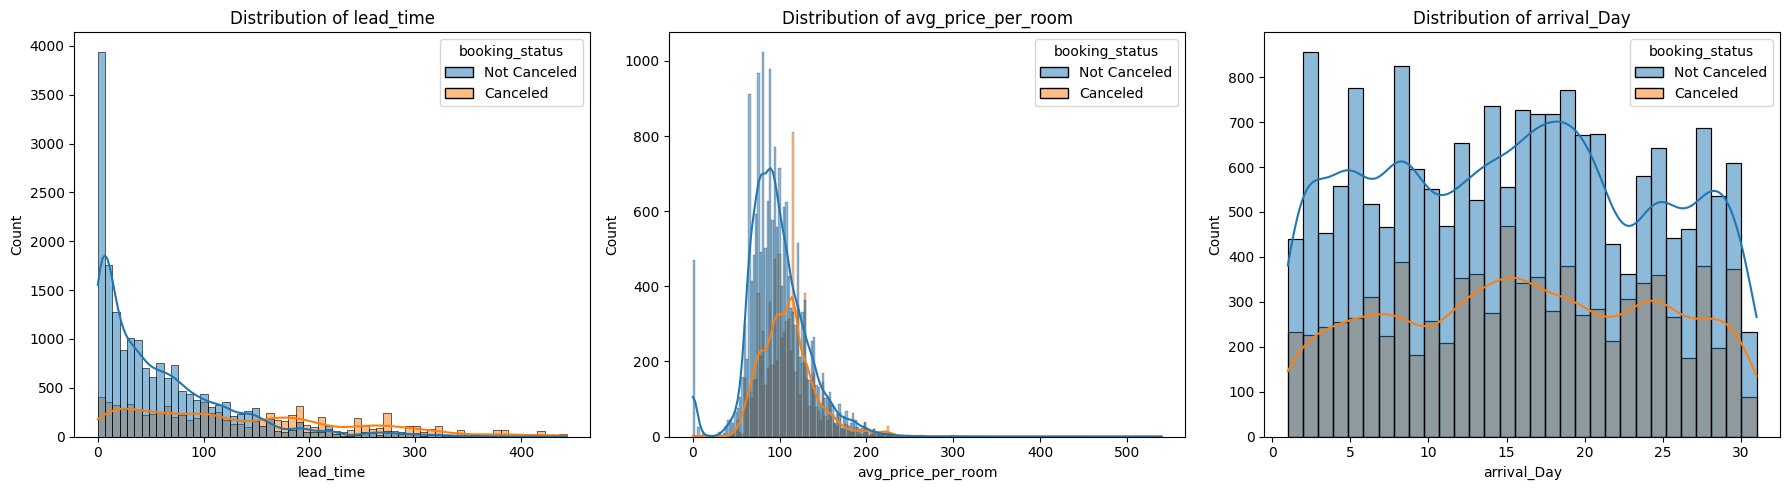

In [59]:
t = 1
plt.figure(figsize=(18, 5))
for i in num_cols:
    plt.subplot(1, 3, t)
    sns.histplot(x=data[i], hue=data['booking_status'], kde=True)
    plt.title(f'Distribution of {i}')
    t += 1
plt.tight_layout()
plt.show()

###### Inferences from Bivariate Analysis
- ***Lead Time:***
Longer lead times are associated with higher cancellation rates.

- ***Average Price per Room:***
Higher room prices are more likely to be canceled.

- ***Arrival Day:***
Cancellations are uniformly distributed across the days of the month.

# Categorical v/s Categorical

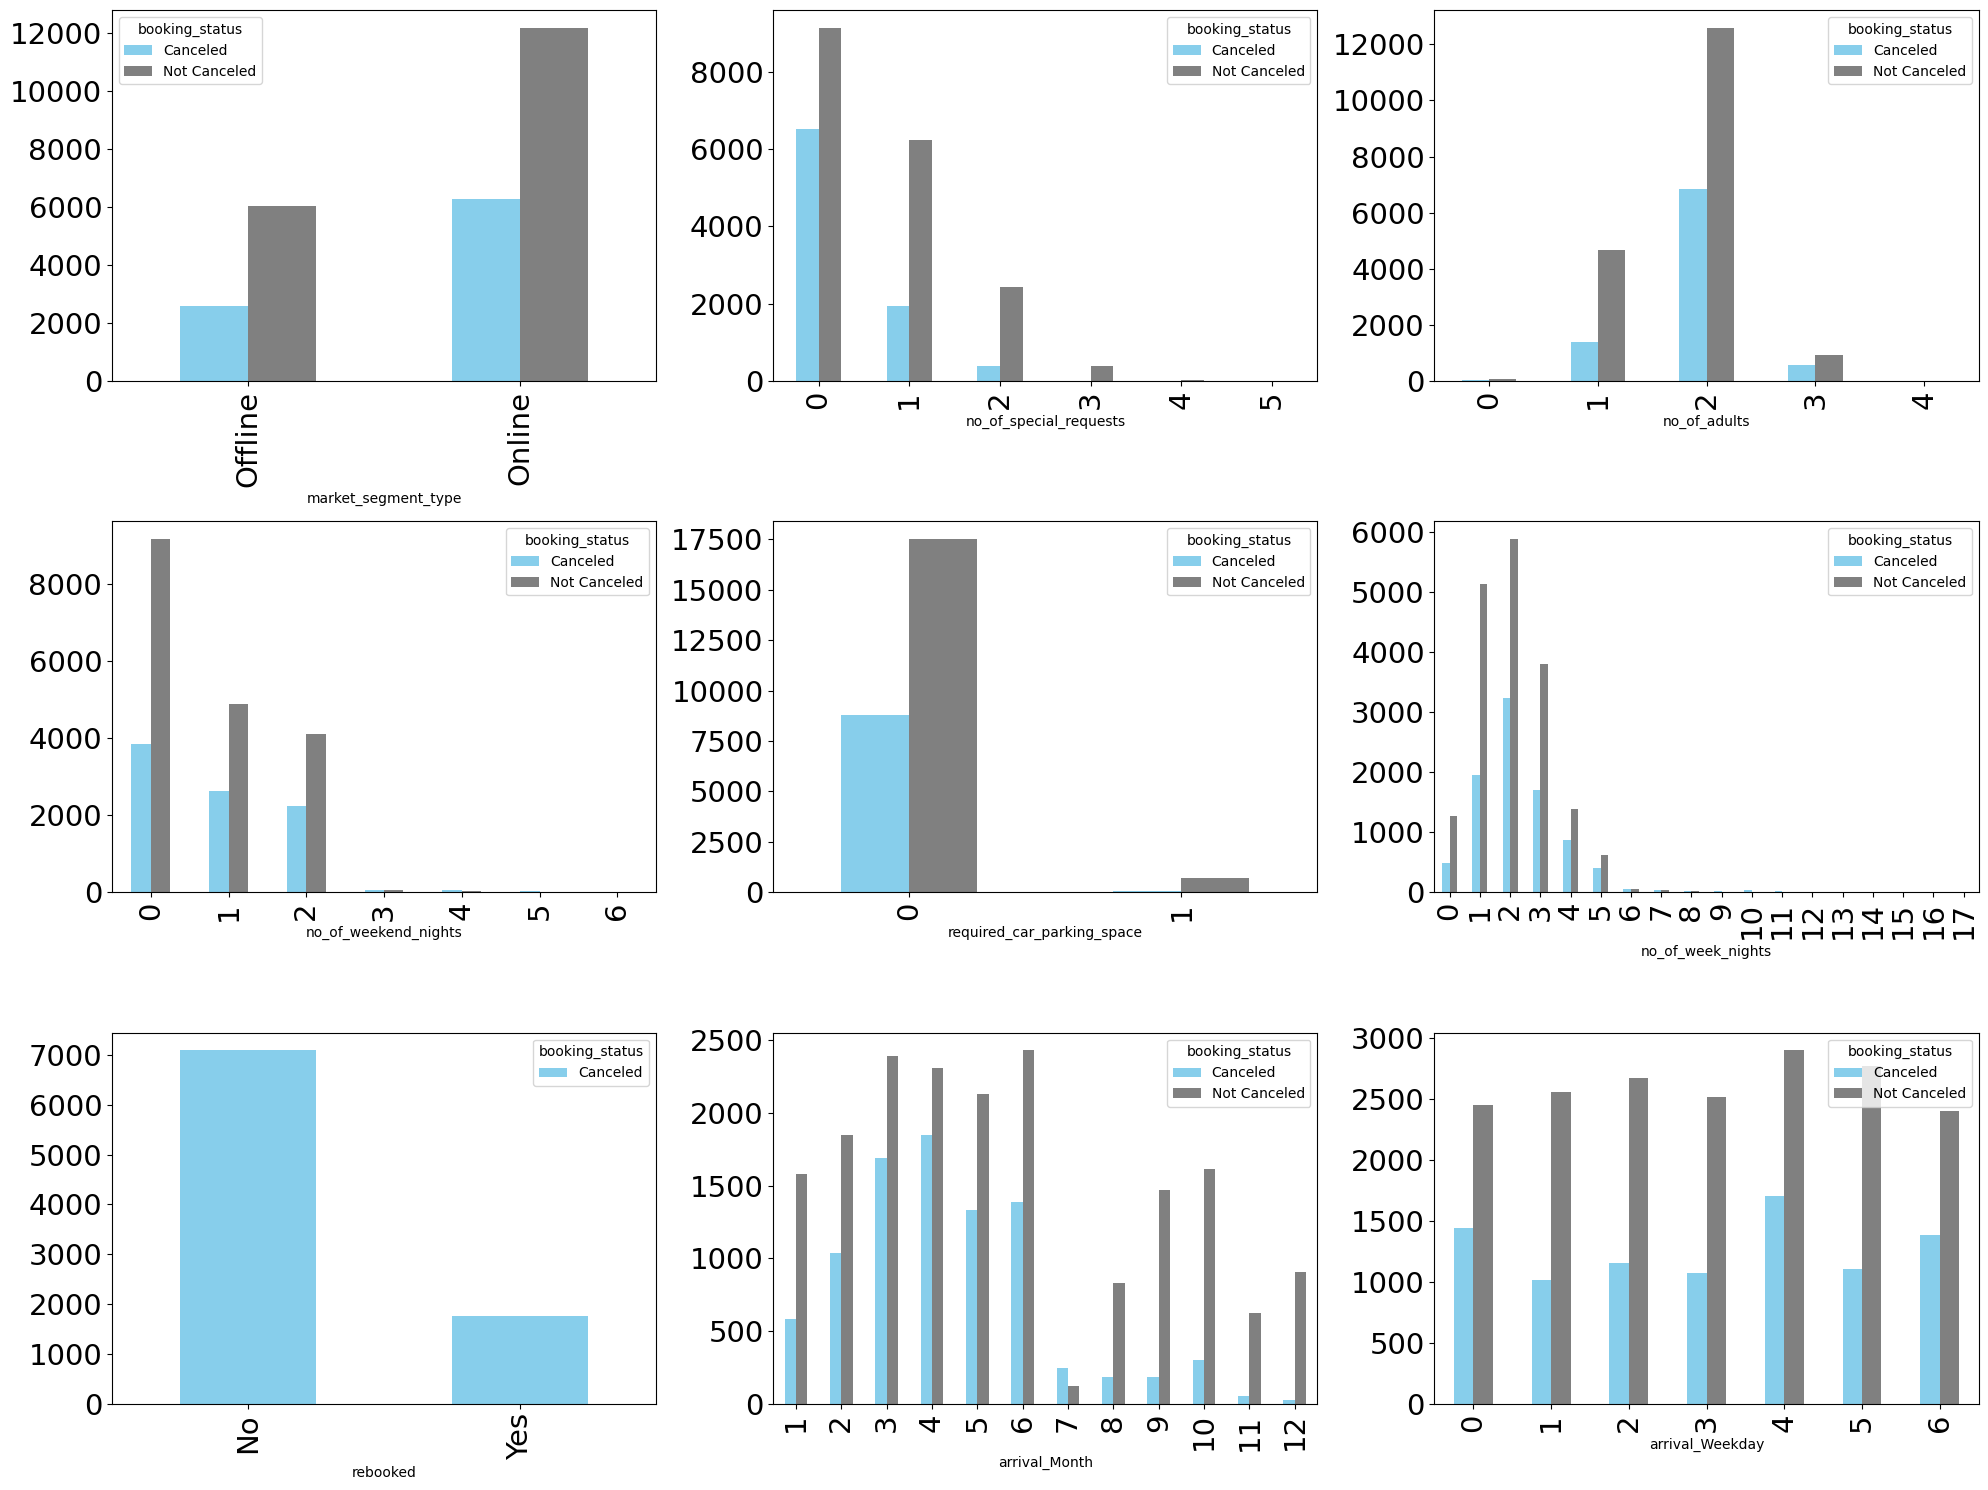

In [60]:
t=1
plt.figure(figsize=(20,15))
for i in cat_cols:
    if i !='booking_status':
        plt.subplot(3,3,t)
        pd.crosstab(index=data[i],columns=data['booking_status']).plot(kind='bar',ax=plt.gca(),fontsize=21,color=['skyblue','grey'])
        t+=1
plt.tight_layout()
plt.show()

###### Inferences from Categorical Data Analysis

- ***Market Segment Type:***
Online bookings have higher cancellation rates than offline bookings.

- ***Number of Special Requests:***
Bookings with fewer special requests (0 or 1) are more likely to be canceled.

- ***Number of Adults:***
Bookings for 2 adults have higher cancellation rates compared to other configurations.

- ***Number of Weekend Nights:***
Bookings with fewer weekend nights (0 or 1) are more frequently canceled.

- ***Required Car Parking Space:***
Bookings that do not require parking spaces are more likely to be canceled.

- ***Rebooked:***
The majority of canceled bookings are not rebooked.

- ***Number of Week Nights:***
Bookings with fewer weeknights (1, 2, or 3) show higher cancellation rates.

- ***Arrival Month:***
Cancellations vary across months, with some peaks, particularly in the middle of the year.

- ***Arrival Weekday:***
Cancellations are relatively evenly distributed across weekdays, with slight variations.

# Inferential Statistical Analysis
Inferential statistical analysis is essential as it allows us to generalize findings from sample data to the broader population. By employing techniques such as hypothesis testing and confidence intervals, we can determine if observed patterns, like the relationship between booking characteristics and cancellation rates, are statistically significant. This ensures that our conclusions are reliable and not merely due to random chance, thereby enabling more informed decision-making.

### Inferential Analysis of Numerical Variables:

#### Hypotheses for Normality Tests
* ***Null Hypothesis (H₀):*** The data for lead time, average price per room, and arrival day are normally distributed.
* ***Alternative Hypothesis (H₁):*** The data for lead time, average price per room, and arrival day are not normally distributed.

In [61]:
print(stats.shapiro(data['lead_time']))
print(stats.shapiro(data['avg_price_per_room']))
print(stats.shapiro(data['arrival_Day']))

ShapiroResult(statistic=0.858092188835144, pvalue=0.0)
ShapiroResult(statistic=0.9544830918312073, pvalue=0.0)
ShapiroResult(statistic=0.9567803740501404, pvalue=0.0)


***Non-Normality:***
* The Shapiro-Wilk test indicates that the distributions of lead time, average price per room, and arrival day significantly deviate from normality (p < 0.05).
* lead time, average price per room, and arrival day distributions are not normal, requiring non-parametric statistical methods for analysis.

#### Non-Parametric Statistical Analysis

* ***Null Hypothesis (H₀):***  There is no significant relation between Num_cols and Booking Status.
* ***Alternative Hypothesis (H₁):***  There is significant relation between Num_cols and Booking Status.

In [62]:
for i in num_cols:
    samp1=data[data['booking_status']=='Not Canceled'][i]
    samp2=data[data['booking_status']=='Canceled'][i]
    print(i,':',stats.mannwhitneyu(samp1,samp2))

lead_time : MannwhitneyuResult(statistic=40528570.5, pvalue=0.0)
avg_price_per_room : MannwhitneyuResult(statistic=61814361.0, pvalue=4.950381137183313e-216)
arrival_Day : MannwhitneyuResult(statistic=77648486.5, pvalue=2.5710270847504093e-07)


##### Inference
- The results of the Mann-Whitney U test show significant associations between the numerical variables (lead time, average price per room, arrival day) and the booking status. 
- With a 95% confidence level, we reject the null hypothesis, indicating that there are meaningful differences in these variables across different booking statuses.


### Inferential Analysis of Categorical Variables:

* ***Null Hypothesis (H₀):***  Categories has no significant relation with Booking Status.
* ***Alternative Hypothesis (H₁):***  Categories has significant relation with Booking Status.

In [63]:
for i in cat_cols:
    if i!='booking_status':
        table=pd.crosstab(index=data[i],columns=data['booking_status'])
        print(i,':',stats.chi2_contingency(table)[1])

market_segment_type : 7.806389643886697e-11
no_of_special_requests : 0.0
no_of_adults : 1.4411855115006094e-73
no_of_weekend_nights : 5.324997086476798e-43
required_car_parking_space : 5.626905783478662e-49
no_of_week_nights : 7.318602549508705e-65
rebooked : 1.0
arrival_Month : 0.0
arrival_Weekday : 2.0528217585454624e-36


###### Inference
- With the exception of the "Rebooked" category, all other categorical variables exhibit statistically significant associations with booking status. 
- This indicates that factors such as market segment type, number of special requests, number of adults, number of weekend nights, required car parking spaces, number of week nights, arrival month, and arrival weekday significantly influence the likelihood of a booking being made. 
- These findings provide valuable insights for refining marketing strategies, adjusting pricing, and tailoring service offerings to better align with various guest preferences and behaviors.

# Refining Data for Analysis

**We will exclude the rebooking feature from the model because this information is only accessible when a booking has been cancelled, which is the scenario we aim to predict.**

In [64]:
data.drop(columns='rebooked',inplace=True)

In [65]:
data.head(2)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,arrival_Day,arrival_Month,arrival_Weekday
0,0,Online,0,85.03,1,1,0,0,Not Canceled,1,1,4
1,34,Online,2,125.10,2,2,0,0,Not Canceled,1,1,4


**I initially combined historical and new data for analysis. However, for refining the dataset, I have separated it again into training and testing datasets. Now, the new data serves as the test dataset, while the historical data serves as the training dataset.**

In [66]:
train=data[data['booking_status'].notnull()]
test=data[data['booking_status'].isnull()]

In [67]:
print(f" Past Data Rows   : {train.shape[0]}")
print(f" Past Data Columns: {train.shape[1]}")

 Past Data Rows   : 27093
 Past Data Columns: 12


In [68]:
print(f" New Data Rows   : {test.shape[0]}")
print(f" New Data Columns: {test.shape[1]}")

 New Data Rows   : 3583
 New Data Columns: 12


### Missing Values

In [69]:
train.isnull().sum()

lead_time                     0
market_segment_type           0
no_of_special_requests        0
avg_price_per_room            0
no_of_adults                  0
no_of_weekend_nights          0
required_car_parking_space    0
no_of_week_nights             0
booking_status                0
arrival_Day                   0
arrival_Month                 0
arrival_Weekday               0
dtype: int64

**Inference:** The absence of missing values ensures that the dataset is complete and ready for further analysis or modeling without the need for imputation or handling missing data. This facilitates more reliable insights and conclusions drawn from the dataset.

### Addressing Outliers in the Data

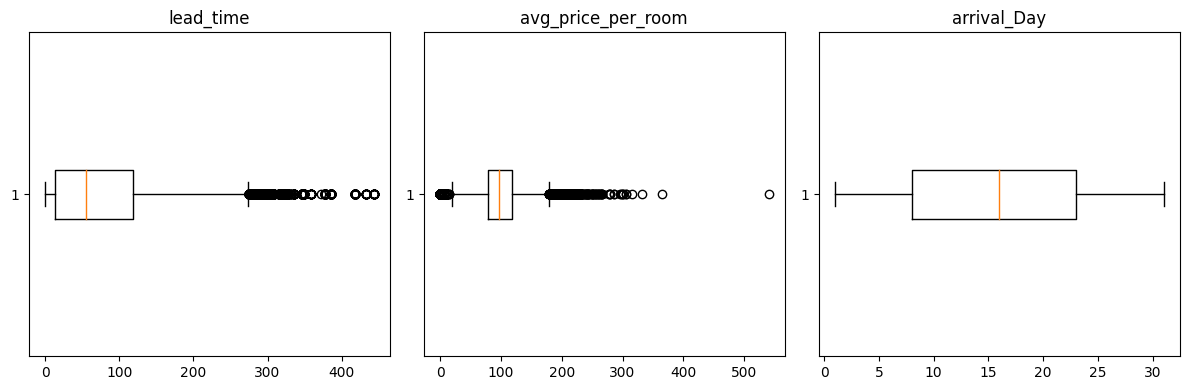

In [70]:
t=1
plt.figure(figsize=(12,4))
for i in num_cols:
    plt.subplot(1,3,t)
    plt.boxplot(x=train[i],vert=False)
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

**Using a multiplier of 2.5 times the Interquartile Range (IQR) is specifically chosen to identify and handle extreme outliers while maintaining the integrity of the dataset.**

In [71]:
for i in num_cols:
    q1,q3=np.quantile(train[i],[0.25,0.75])
    iqr=q3-q1
    ul,ll=q3+2.5*iqr,q1-2.5*iqr
    train[i]=np.where(train[i]>ul,ul,train[i])
    train[i]=np.where(train[i]<ll,ll,train[i])

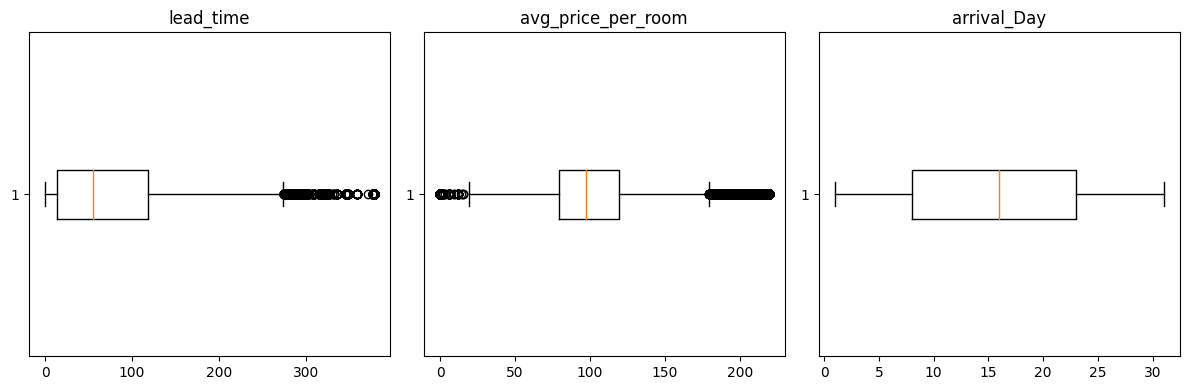

In [72]:
t=1
plt.figure(figsize=(12,4))
for i in num_cols:
    plt.subplot(1,3,t)
    plt.boxplot(x=train[i],vert=False,)
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

# Transforming Categorical Data into Numerical Format

Encoding transforms categorical data into numerical format for machine learning models, ensuring compatibility and meaningful representation of categorical variables in predictive analysis.

In [73]:
train.head(2)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,arrival_Day,arrival_Month,arrival_Weekday
0,0.00,Online,0,85.03,1,1,0,0,Not Canceled,1.00,1,4
1,34.00,Online,2,125.10,2,2,0,0,Not Canceled,1.00,1,4


In [74]:
train['booking_status']=train['booking_status'].map({'Canceled':1,'Not Canceled':0})

In [75]:
train=pd.get_dummies(train,drop_first=True,dtype=int)
test=pd.get_dummies(test,drop_first=True,dtype=int)

In [76]:
train.shape

(27093, 12)

In [77]:
test.shape

(3583, 11)

# Train Test Split
Splitting the data is essential to ensure unbiased model assessment. The training set is used to train the model on known data. The testing set then helps verify how well the model generalizes to unseen data, minimizing overfitting and providing an estimate of model performance on new data

In [78]:
x_test=test
y_test=actual_y.map({'Canceled':1,'Not Canceled':0})

x_train =train.drop(columns='booking_status')
y_train=train['booking_status']

In [79]:
pd.DataFrame({'Dataset': ['X_Train', 'X_Test', 'Y_Train', 'Y_Test'],
    'Rows': [27093, 3583, 27093, 3583],
    'Columns': [11, 12, 1, 1] })

,Dataset,Rows,Columns
0,X_Train,27093,11
1,X_Test,3583,12
2,Y_Train,27093,1
3,Y_Test,3583,1


# Model Training and Evaluation:

Model Training and Evaluation: This phase entails fitting machine learning algorithms to training data to discern patterns and relationships. Subsequently, the models' efficacy is evaluated using separate test data to gauge performance metrics such as accuracy, precision, recall, and F1-score, ensuring their reliability and predictive capability on unseen data.

In [80]:
mod=[]
accu=[]
prec=[]
rec=[]
f1=[]
kappa=[]

def Model_validation(model,xtrain,ytrain,xtest,ytest):
    m=model
    m.fit(xtrain,ytrain)
    pred_h=m.predict(xtest)
    pred_s=m.predict_proba(xtest)[:,1]
    
    print(f'Confusion Metrix :\n {confusion_matrix(ytest,pred_h)}')
    print(f'classification Report :\n {classification_report(ytest,pred_h)}')
    
    FPR,TPR,THRESH = roc_curve(ytest,pred_s)
    plt.plot(FPR,TPR)
    plt.plot([0,1],[0,1],color='red',ls='--')
    plt.title(f'ROC AUC {round(roc_auc_score(ytest,pred_s),2)}')
    plt.show()
    
    
    Response =input('Do you want to save a model Y/N ?')
    
    if Response.lower()=='y':
    
    
        global scorecard
        mod.append(str(model))
        accu.append(accuracy_score(ytest,pred_h))
        rec.append(recall_score(ytest,pred_h))
        prec.append(precision_score(ytest,pred_h))
        f1.append(f1_score(ytest,pred_h))
        kappa.append(cohen_kappa_score(ytest,pred_h))

        scorecard=pd.DataFrame({'Model':mod,
                               'Accuracy':accu,
                               'Recall':rec,
                               'Precision':prec,
                               'F1 Score':f1,
                               'Cohen Kappa':kappa})
    else:
        return

**This Model_validation function serves the purpose of training a machine learning model, evaluating its performance using various metrics, and optionally saving the evaluation results in a DataFrame (scorecard).**

### **Logistic Regression**
It is a statistical model used for binary classification tasks, where the goal is to predict a categorical outcome with two possible classes (e.g., yes/no, true/false, 0/1). Despite its name, logistic regression is primarily used for classification rather than regression.

Confusion Metrix :
 [[2166  217]
 [ 587  613]]
classification Report :
               precision    recall  f1-score   support

           0       0.79      0.91      0.84      2383
           1       0.74      0.51      0.60      1200

    accuracy                           0.78      3583
   macro avg       0.76      0.71      0.72      3583
weighted avg       0.77      0.78      0.76      3583



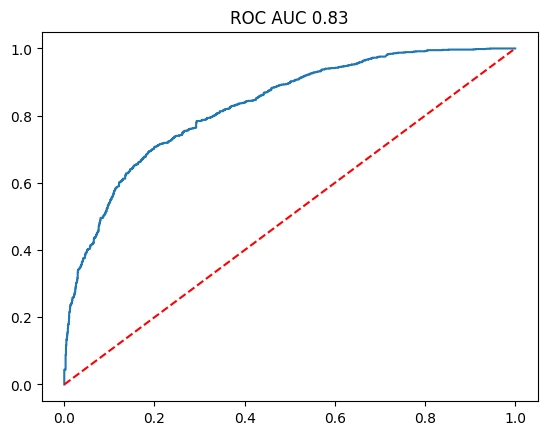

Do you want to save a model Y/N ?y


In [81]:
Model_validation(LogisticRegression(),x_train,y_train,x_test,y_test)

### Gaussian Naive Bayes.
* It can predict hotel booking cancellations based on features like lead time, booking channel. It assumes that these features follow a Gaussian distribution and calculates the likelihood of a booking being canceled using Bayes' theorem.
* It's beneficial for its simplicity and efficiency, making it suitable for predicting cancellation probabilities in scenarios where the assumption of feature independence is reasonable. However, it may not capture complex relationships between predictors as effectively as other models.

Confusion Metrix :
 [[1917  466]
 [ 518  682]]
classification Report :
               precision    recall  f1-score   support

           0       0.79      0.80      0.80      2383
           1       0.59      0.57      0.58      1200

    accuracy                           0.73      3583
   macro avg       0.69      0.69      0.69      3583
weighted avg       0.72      0.73      0.72      3583



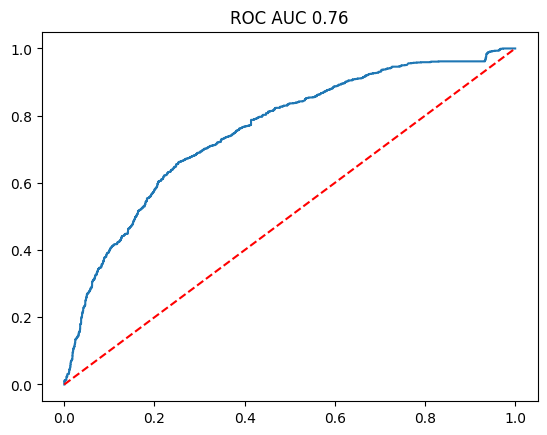

Do you want to save a model Y/N ?y


In [82]:
Model_validation(GaussianNB(),x_train,y_train,x_test,y_test)

# Decision Tree Classifier
* It is a supervised learning algorithm used for classification tasks. It builds a decision tree model by recursively partitioning the data into subsets based on the values of predictor variables.

* Simple to understand and interpret, providing insights into feature importance and relationships. It can handle both numerical and categorical data without requiring extensive data preprocessing.

Confusion Metrix :
 [[2158  225]
 [ 355  845]]
classification Report :
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      2383
           1       0.79      0.70      0.74      1200

    accuracy                           0.84      3583
   macro avg       0.82      0.80      0.81      3583
weighted avg       0.84      0.84      0.84      3583



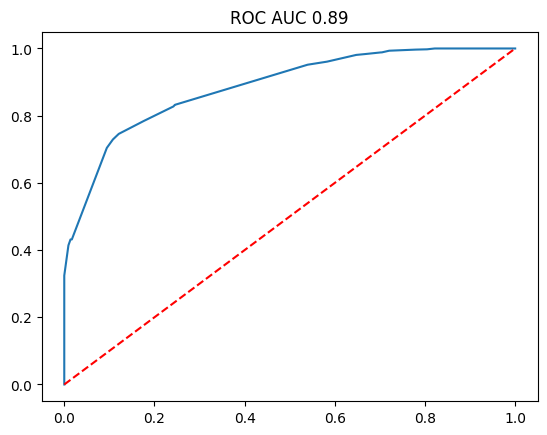

Do you want to save a model Y/N ?y


In [83]:
Model_validation(DecisionTreeClassifier(max_depth=5),x_train,y_train,x_test,y_test)

### Random Forest Classifier
* It is an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes (classification) or average prediction (regression) of the individual trees.

* It reduces overfitting compared to individual decision trees by averaging multiple models. It handles high-dimensional datasets well and can capture complex relationships between predictors.

Confusion Metrix :
 [[2155  228]
 [ 345  855]]
classification Report :
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      2383
           1       0.79      0.71      0.75      1200

    accuracy                           0.84      3583
   macro avg       0.83      0.81      0.82      3583
weighted avg       0.84      0.84      0.84      3583



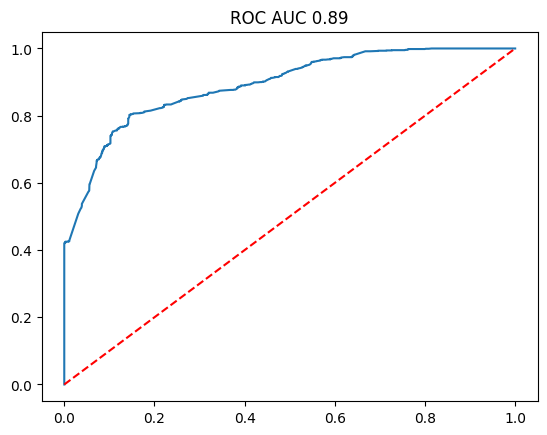

Do you want to save a model Y/N ?y


In [84]:
Model_validation(RandomForestClassifier(n_estimators=150,max_features=11,max_depth=5),x_train,y_train,x_test,y_test)

### AdaBoostClassifier
* AdaBoostClassifier is an ensemble learning method that combines multiple weak learners (typically decision trees) sequentially. It adjusts the weights of incorrectly classified instances to prioritize difficult cases in subsequent iterations.

* Effective in improving predictive performance by focusing on hard-to-classify instances. It reduces bias and variance, enhancing model robustness.

Confusion Metrix :
 [[2118  265]
 [ 466  734]]
classification Report :
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      2383
           1       0.73      0.61      0.67      1200

    accuracy                           0.80      3583
   macro avg       0.78      0.75      0.76      3583
weighted avg       0.79      0.80      0.79      3583



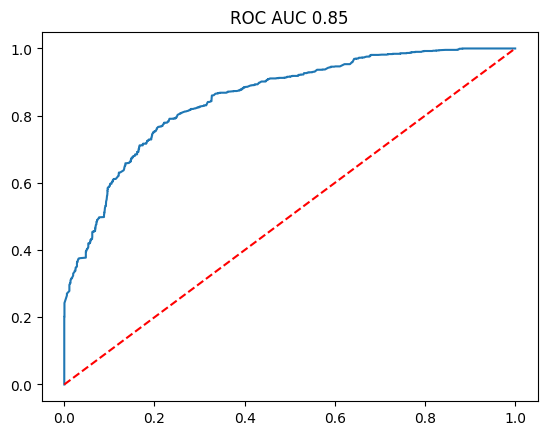

Do you want to save a model Y/N ?y


In [85]:
Model_validation(AdaBoostClassifier(n_estimators=150,learning_rate=0.1),x_train,y_train,x_test,y_test)

### Gradient Boosting Classifier
* It is an ensemble learning method that builds an ensemble of decision trees sequentially. Each tree corrects the errors of its predecessor, focusing on instances that were previously misclassified.
* It combines the strengths of decision trees (flexibility in handling complex relationships) with boosting techniques (sequential improvement of weak learners). It often yields higher accuracy compared to individual decision trees.

Confusion Metrix :
 [[1927  456]
 [ 285  915]]
classification Report :
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      2383
           1       0.67      0.76      0.71      1200

    accuracy                           0.79      3583
   macro avg       0.77      0.79      0.78      3583
weighted avg       0.80      0.79      0.80      3583



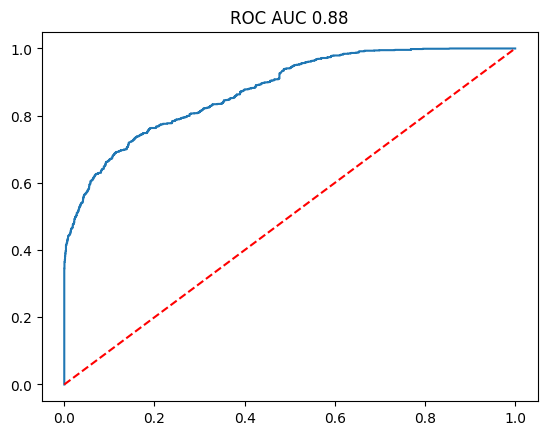

Do you want to save a model Y/N ?y


In [86]:
Model_validation(GradientBoostingClassifier(max_depth=7),x_train,y_train,x_test,y_test)

### Extreme Gradient Boosting Classifier
* XGBClassifier is an ensemble learning method based on decision trees. It sequentially builds a series of trees and combines their predictions to improve accuracy.

* Known for its efficiency, speed, and high performance. It handles large datasets well and is robust to noise and outliers. It can capture complex relationships and interactions between features.

Confusion Metrix :
 [[2062  321]
 [ 348  852]]
classification Report :
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      2383
           1       0.73      0.71      0.72      1200

    accuracy                           0.81      3583
   macro avg       0.79      0.79      0.79      3583
weighted avg       0.81      0.81      0.81      3583



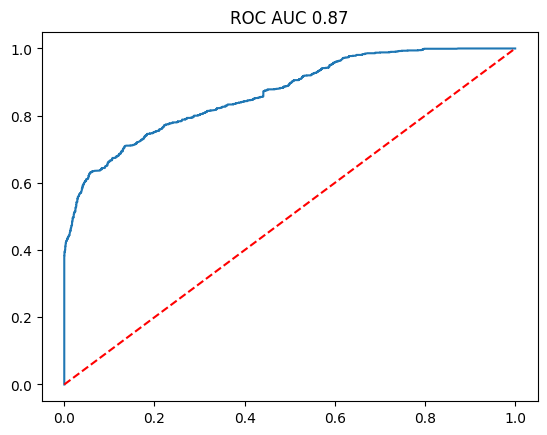

Do you want to save a model Y/N ?y


In [87]:
Model_validation(XGBClassifier(n_estimators=250,learning_rate=0.01,max_depth=7),x_train,y_train,x_test,y_test)

In [88]:
scorecard

,Model,Accuracy,Recall,Precision,F1 Score,Cohen Kappa
0,LogisticRegression(),0.78,0.51,0.74,0.60,0.45
1,GaussianNB(),0.73,0.57,0.59,0.58,0.38
2,DecisionTreeClassifier(max_depth=5),0.84,0.70,0.79,0.74,0.63
3,"RandomForestClassifier(max_depth=5, max_featur...",0.84,0.71,0.79,0.75,0.63
4,"AdaBoostClassifier(learning_rate=0.1, n_estima...",0.80,0.61,0.73,0.67,0.52
5,GradientBoostingClassifier(max_depth=7),0.79,0.76,0.67,0.71,0.55
6,"XGBClassifier(base_score=None, booster=None, c...",0.81,0.71,0.73,0.72,0.58


### Voting
* It is an ensemble method that combines multiple machine learning models (classifiers or regressors) to make predictions. It aggregates the predictions of individual models and selects the majority class (for classification) or averages the predictions (for regression).
* Voting can improve prediction accuracy by leveraging the strengths of multiple models and reducing individual model biases. It can also enhance robustness and generalization by balancing model errors.

In [89]:
base_estimators=[('Decision Tree1',DecisionTreeClassifier(max_depth=7)),
                 ('Decision Tree2',DecisionTreeClassifier(max_depth=5)),
                 ('Random Forest1',RandomForestClassifier(n_estimators=150,max_depth=5)),
                 ('Random Forest2',RandomForestClassifier(n_estimators=200,max_depth=7)),
                ('XGBoost',XGBClassifier(n_estimators=200,max_depth=5))]

In [90]:
vc=VotingClassifier(estimators=base_estimators,voting='soft')

In [91]:
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('Decision Tree1',
                              DecisionTreeClassifier(max_depth=7)),
                             ('Decision Tree2',
                              DecisionTreeClassifier(max_depth=5)),
                             ('Random Forest1',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=150)),
                             ('Random Forest2',
                              RandomForestClassifier(max_depth=7,
                                                     n_estimators=200)),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            co...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

Confusion Metrix :
 [[2195  188]
 [ 353  847]]
classification Report :
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      2383
           1       0.82      0.71      0.76      1200

    accuracy                           0.85      3583
   macro avg       0.84      0.81      0.82      3583
weighted avg       0.85      0.85      0.85      3583



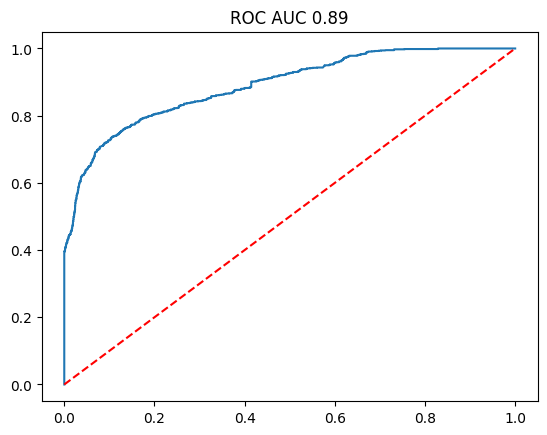

Do you want to save a model Y/N ?y


In [92]:
Model_validation(VotingClassifier(estimators=base_estimators,voting='soft'),x_train,y_train,x_test,y_test)

# Stacking
* It is an ensemble learning technique that combines multiple classification or regression models through a meta-learner (or blender). It involves training several base models on the dataset, then using their predictions as inputs to a higher-level model (meta-learner) that makes the final prediction.
* Stacking can capture complex relationships in data and often leads to improved predictive performance compared to individual models. It leverages the strengths of diverse models and mitigates their weaknesses.

In [93]:
base_estimators

[('Decision Tree1', DecisionTreeClassifier(max_depth=7)),
 ('Decision Tree2', DecisionTreeClassifier(max_depth=5)),
 ('Random Forest1', RandomForestClassifier(max_depth=5, n_estimators=150)),
 ('Random Forest2', RandomForestClassifier(max_depth=7, n_estimators=200)),
 ('XGBoost',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=5, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=200, n_jobs=None,
       

In [94]:
sc=StackingClassifier(estimators=base_estimators,final_estimator=DecisionTreeClassifier(max_depth=5),cv=7)

In [95]:
sc.fit(x_train,y_train)

StackingClassifier(cv=7,
                   estimators=[('Decision Tree1',
                                DecisionTreeClassifier(max_depth=7)),
                               ('Decision Tree2',
                                DecisionTreeClassifier(max_depth=5)),
                               ('Random Forest1',
                                RandomForestClassifier(max_depth=5,
                                                       n_estimators=150)),
                               ('Random Forest2',
                                RandomForestClassifier(max_depth=7,
                                                       n_estimators=200)),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=DecisionTreeClassifier(max_depth=5))

Confusion Metrix :
 [[2266  117]
 [ 554  646]]
classification Report :
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      2383
           1       0.85      0.54      0.66      1200

    accuracy                           0.81      3583
   macro avg       0.83      0.74      0.76      3583
weighted avg       0.82      0.81      0.80      3583



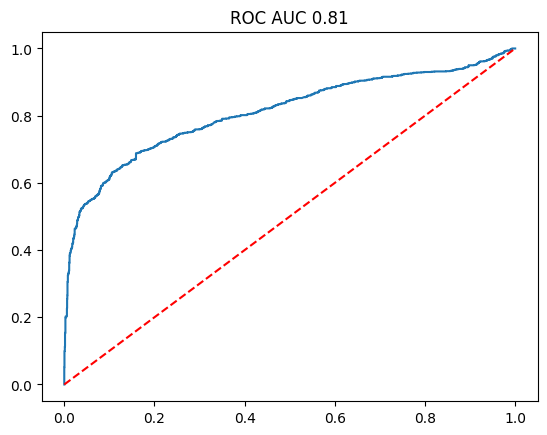

Do you want to save a model Y/N ?y


In [96]:
Model_validation(StackingClassifier(estimators=base_estimators,cv=7),x_train,y_train,x_test,y_test)

In [97]:
scorecard.sort_values(by='F1 Score',ascending=False)

,Model,Accuracy,Recall,Precision,F1 Score,Cohen Kappa
7,VotingClassifier(estimators=[('Decision Tree1'...,0.85,0.71,0.82,0.76,0.65
3,"RandomForestClassifier(max_depth=5, max_featur...",0.84,0.71,0.79,0.75,0.63
2,DecisionTreeClassifier(max_depth=5),0.84,0.70,0.79,0.74,0.63
6,"XGBClassifier(base_score=None, booster=None, c...",0.81,0.71,0.73,0.72,0.58
5,GradientBoostingClassifier(max_depth=7),0.79,0.76,0.67,0.71,0.55
4,"AdaBoostClassifier(learning_rate=0.1, n_estima...",0.80,0.61,0.73,0.67,0.52
8,"StackingClassifier(cv=7,\n e...",0.81,0.54,0.85,0.66,0.54
0,LogisticRegression(),0.78,0.51,0.74,0.60,0.45
1,GaussianNB(),0.73,0.57,0.59,0.58,0.38


###### Model Performance:

* VotingClassifier and RandomForestClassifier achieve the highest recall (0.71) and F1 score (0.76), indicating they effectively identify positive instances (cancellations) and balance precision and recall.

* RandomForestClassifier stands out for its slightly higher precision (0.79) compared to VotingClassifier (0.82), implying it predicts cancellations more accurately when it predicts them.

###### Complexity and Speed:
* RandomForestClassifier is noted for its lower complexity compared to VotingClassifier, suggesting faster execution times during model training and prediction.

###### Inference:
* **Choice of Model:** Given its balanced performance metrics and lower complexity, RandomForestClassifier is recommended for fine-tuning and deployment.
* **Next Steps:** Focus on optimizing hyperparameters of the RandomForestClassifier through fine-tuning techniques such as grid search or randomized search. After optimization, deploy the model for hotel cancellation prediction to leverage its predictive accuracy and efficiency.

# Final Model

In [98]:
grid=({'n_estimators':[70,100],'max_features':[7,8,9],'max_depth':[5,6,7,8]})

In [99]:
gscv=GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid,scoring='f1',verbose=1)

In [100]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6, 7, 8], 'max_features': [7, 8, 9],
                         'n_estimators': [70, 100]},
             scoring='f1', verbose=1)

In [101]:
gscv.best_params_

{'max_depth': 5, 'max_features': 9, 'n_estimators': 100}

In [102]:
gscv.best_score_

0.5966009174663157

In [103]:
Final_Model = RandomForestClassifier(**gscv.best_params_)

In [104]:
Final_Model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, max_features=9)

In [105]:
pred_h=Final_Model.predict(x_test)
pred_s=Final_Model.predict_proba(x_test)[:,1]

In [106]:
# Lets try to find out the best cut off classifier

In [107]:
fpr,tpr,thresh=roc_curve(y_test,pred_s)

In [108]:
ROC_Table=pd.DataFrame({'FPR':fpr,'TPR':tpr,'Threshold':thresh,'YI':tpr*(1-fpr)}).sort_values(by='YI',ascending=False)
ROC_Table

,FPR,TPR,Threshold,YI
337,0.11,0.76,0.38,0.67
338,0.12,0.76,0.38,0.67
335,0.11,0.76,0.38,0.67
332,0.11,0.75,0.38,0.67
330,0.11,0.75,0.39,0.67
...,...,...,...,...
1138,1.00,1.00,0.02,0.00
1,0.00,0.00,0.97,0.00
1139,1.00,1.00,0.02,0.00
0,0.00,0.00,1.97,0.00


In [109]:
pred_h=(pred_s>0.365256).astype(int)

In [110]:
print(classification_report(y_test,pred_h))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2383
           1       0.74      0.77      0.76      1200

    accuracy                           0.83      3583
   macro avg       0.81      0.82      0.81      3583
weighted avg       0.83      0.83      0.83      3583



In [111]:
#HARD Prediction
Final_Model.predict([[10,1,77,2,2,0,1,4,6,1,1]])

array([0], dtype=int64)

In [112]:
#SOFT Prediction
Final_Model.predict_proba([[10,1,77,2,2,0,1,4,6,1,1]])

array([[0.84723011, 0.15276989]])

# Conclusion:

#### **Model Performance:**
The model seems to perform reasonably well based on the provided predictions. It confidently predicts that the booking will not be canceled (0) for the given input.

#### Confidence Levels:
The high probability (0.8619) associated with the predicted class (0) suggests strong certainty in the model's prediction.
Usage:

This model output can be used to make informed decisions in operational scenarios related to hotel management, such as resource allocation, capacity planning, and customer service management.

# Deployment
Deployment involves making a machine learning model operational for real-world use through serialization, API/web service creation, integration with existing systems, and ensuring scalability, security, and monitoring for effective functionality and performance in production environments.

In [113]:
# Lets Save the Model
import pickle

In [114]:
with open('Final_Model.pkl','wb') as file:
    pickle.dump(Final_Model,file)